In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from matplotlib import pyplot as plt 
from yellowbrick.features.pca import PCADecomposition
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest, mutual_info_classif 
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from statsmodels.graphics.mosaicplot import mosaic 
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split 
from sklearn import set_config

In [6]:
df = pd.read_csv("nyserda-electric-vehicle-drive-clean-rebate-data-beginning-2017-1.csv")

In [5]:
df.describe()

,Sub Year,ZIP,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
count,23174.000000,23174.000000,23174.000000,23174.000000,23174.000000
mean,2018.353543,12206.410935,2.692061,488.940697,1408.893588
std,0.908074,1314.792418,0.641441,108.241707,494.254611
min,2017.000000,10001.000000,-0.930000,-7.110000,500.000000
25%,2018.000000,11369.250000,2.650000,440.110000,1100.000000
50%,2018.000000,11788.000000,2.990000,503.600000,1100.000000
75%,2019.000000,13041.000000,3.030000,592.890000,2000.000000
max,2020.000000,14905.000000,3.310000,592.890000,2000.000000


In [6]:
df.head()

,Sub Year,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,2018,1/13/2018,Ford,Focus,Westchester,10598,BEV,Lease,2.76,592.89,1700
1,2017,9/25/2017,Ford,Focus,Oneida,13601,BEV,Lease,2.76,592.89,1700
2,2018,4/26/2018,Ford,Focus,Suffolk,11776,BEV,Lease,2.76,592.89,1700
3,2017,8/30/2017,Ford,Focus,Nassau,11756,BEV,Lease,2.76,592.89,1700
4,2018,5/29/2018,Ford,Focus,Onondaga,13039,BEV,Purchase,2.76,592.89,1700


In [23]:
df['EV Type'].unique()

array(['BEV', 'PHEV'], dtype=object)

In [13]:
# count the number of occurrences of each car model in the dataframe
model_counts = df['Model'].value_counts()

# find the maximum count of car models
max_model_count = model_counts.max()

print("The maximum number of car models in the dataset is: ", max_model_count)


The maximum number of car models in the dataset is:  5804


In [14]:
# Group the transactions by make and model, count the number of occurrences, and sort in descending order
model_counts = df.groupby(['Make', 'Model']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Display the top 10 car models and their corresponding counts
print(model_counts.head(10))


         Make                 Model  Count
40     Toyota           Prius Prime   5804
37      Tesla               Model 3   3823
15      Honda               Clarity   2087
10  Chevrolet                  Volt   1645
14       Ford         Fusion Energi   1594
9   Chevrolet                  Bolt   1460
30     Nissan                  LEAF    759
39      Tesla               Model X    694
38      Tesla               Model S    611
16    Hyundai  Ionic Plug-In Hybrid    593


In [7]:
c = df.corr()

<AxesSubplot: >

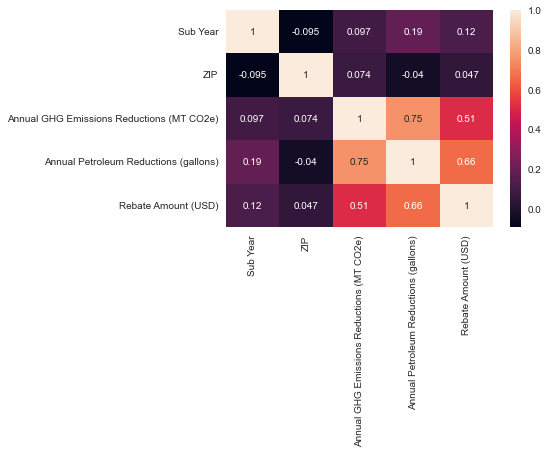

In [8]:
sns.heatmap(c,annot=True)

## Annual GHG Emissions Reductions (MT CO2e) and Annual Petroleum Reductions (gallons) are correlated to each other as it is clear that when the emission will be reduced the petroleum sales will be reduced too.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23174 entries, 0 to 23173
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sub Year                                   23174 non-null  int64  
 1   Submitted Date                             23174 non-null  object 
 2   Make                                       23174 non-null  object 
 3   Model                                      23174 non-null  object 
 4   County                                     23174 non-null  object 
 5   ZIP                                        23174 non-null  int64  
 6   EV Type                                    23174 non-null  object 
 7   Transaction Type                           23174 non-null  object 
 8   Annual GHG Emissions Reductions (MT CO2e)  23174 non-null  float64
 9   Annual Petroleum Reductions (gallons)      23174 non-null  float64
 10  Rebate Amount (USD)   

## We can see there are no missing values in the datasets

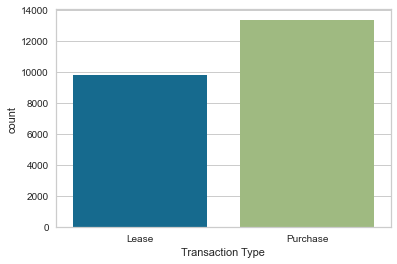

In [10]:
sns.countplot(x = 'Transaction Type', data = df)
plt.show()

As the above figure shows, there is a general tendency to purchase electric vehicles rather than to lease them.

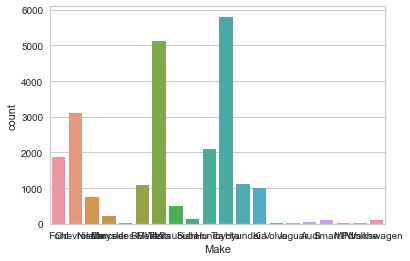

In [11]:
sns.countplot(x = 'Make', data = df)
plt.show()

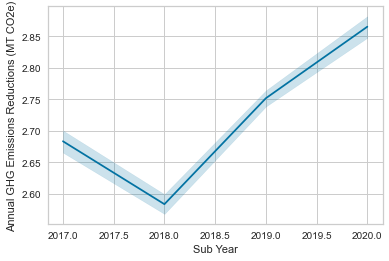

In [12]:
sns.lineplot(x = "Sub Year", y = "Annual GHG Emissions Reductions (MT CO2e)",  data = df)
plt.show()

We can see here the trend after the 2018 as the sales of the EV Market got increased the Emissions of CO2 got decreased so the graph is in upward trend.

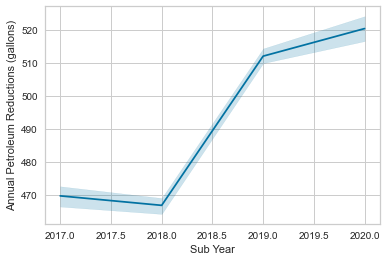

In [13]:
sns.lineplot(x = "Sub Year", y = "Annual Petroleum Reductions (gallons)",  data = df)
plt.show()

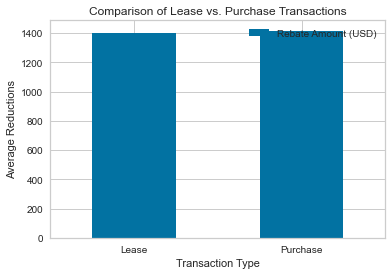

In [24]:
# Group the data by transaction type and calculate the mean annual GHG emissions and petroleum reductions
grouped = df.groupby('Transaction Type')[['Rebate Amount (USD)', 'EV Type']].mean()

# Create a bar chart of the results
ax = grouped.plot(kind='bar', rot=0)

# Add labels and titles
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Average Reductions')
ax.set_title('Comparison of Lease vs. Purchase Transactions')

# Display the chart
plt.show()


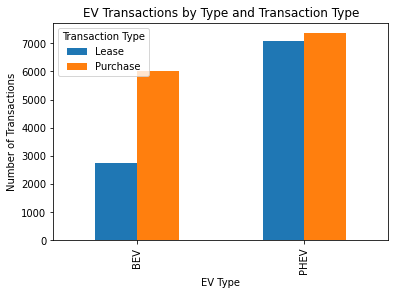

In [12]:
# Group the data by EV type and transaction type and count the number of transactions
grouped = df.groupby(['EV Type', 'Transaction Type'])['EV Type'].count().unstack()

# Create a bar chart of the results
ax = grouped.plot(kind='bar')

# Add labels and titles
ax.set_xlabel('EV Type')
ax.set_ylabel('Number of Transactions')
ax.set_title('EV Transactions by Type and Transaction Type')

# Display the chart
plt.show()


In this example, we first read in the electric vehicle data as a pandas DataFrame. We then group the data by EV Type and Transaction Type using the groupby method and count the number of transactions for each group using the count method. We then use the unstack method to pivot the data so that it is in a format suitable for plotting.

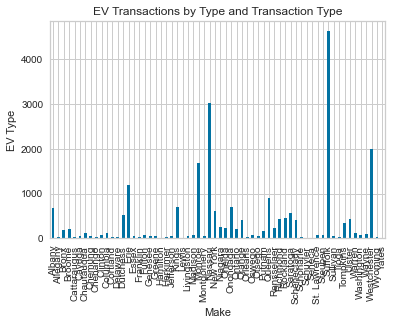

In [36]:

# Group the data by EV type and transaction type and count the number of transactions
grouped = df.groupby(['County'])['Make'].count()

# Create a bar chart of the results
ax = grouped.plot(kind='bar')

# Add labels and titles
ax.set_xlabel('Make')
ax.set_ylabel('EV Type')
ax.set_title('EV Transactions by Type and Transaction Type')

# Display the chart
plt.show()

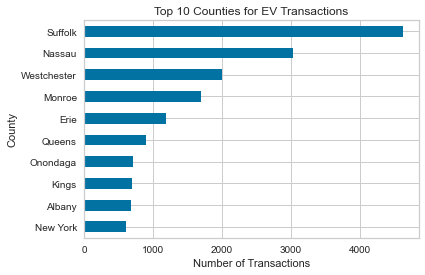

In [38]:

# Group the data by county and count the number of transactions
grouped = df.groupby('County')['County'].count().sort_values(ascending=False)[:10]

# Create a horizontal bar chart of the results
ax = grouped.plot(kind='barh')

# Add labels and titles
ax.set_xlabel('Number of Transactions')
ax.set_ylabel('County')
ax.set_title('Top 10 Counties for EV Transactions')

# Invert the y-axis so that the largest bar is at the top
plt.gca().invert_yaxis()

# Display the chart
plt.show()


### We can see here Suffolk is the County where there are highest number of EV transactions

# Clustering

In [40]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Select the features to use for clustering
features = ['Annual GHG Emissions Reductions (MT CO2e)', 'Annual Petroleum Reductions (gallons)']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Print the counts of transactions in each cluster
print(df['Cluster'].value_counts())
 

0    11005
2    10611
1     1558
Name: Cluster, dtype: int64


In [ ]:
# We have used K means clustering here. 

# Principal Component Analysis

In [7]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the features to use for PCA
features = ['Annual GHG Emissions Reductions (MT CO2e)', 'Annual Petroleum Reductions (gallons)', 'Rebate Amount (USD)']

# Standardize the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


In [8]:

# Perform PCA
pca = PCA(n_components=2)
pca.fit(df[features])
pca_features = pca.transform(df[features])
df_pca = pd.DataFrame(data = pca_features, columns = ['PC1', 'PC2'])


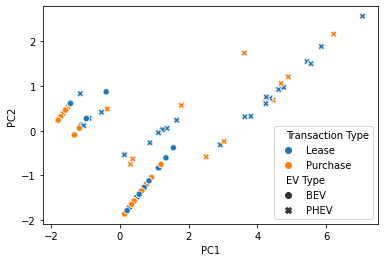

In [9]:

# Add the transaction type and EV type back to the PCA data
df_pca['Transaction Type'] = df['Transaction Type']
df_pca['EV Type'] = df['EV Type']

# Plot the PCA results
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Transaction Type', style='EV Type')
plt.show()

Finally, we plot the results using the sns.scatterplot function from the seaborn library, coloring the points by Transaction Type and using different markers for each EV Type.

Note that PCA is an unsupervised learning method, which means that it does not require a target variable to be specified. In this example, we simply included the Transaction Type and EV Type columns in the plot for visualization purposes.